# ALl Rent

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

**Uploading the dataset**

In [2]:
rent_df = pd.read_csv('DS2_C5_S6_AllRent_Data_Challenge.csv')

**Aim** : predict the interest level of the apartments based on the features , interest level is defined as low, medium and high therefore we are using the classification model.

In [3]:
rent_df.head()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high


In [4]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9871 non-null   int64  
 1   bathrooms        9871 non-null   float64
 2   bedrooms         9871 non-null   int64  
 3   building_id      9871 non-null   object 
 4   created          9871 non-null   object 
 5   description      9585 non-null   object 
 6   display_address  9837 non-null   object 
 7   features         9871 non-null   object 
 8   latitude         9871 non-null   float64
 9   listing_id       9871 non-null   int64  
 10  longitude        9871 non-null   float64
 11  manager_id       9871 non-null   object 
 12  photos           9871 non-null   object 
 13  price            9871 non-null   int64  
 14  street_address   9866 non-null   object 
 15  interest_level   9871 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


In [5]:
rent_df.isnull().sum()

Unnamed: 0           0
bathrooms            0
bedrooms             0
building_id          0
created              0
description        286
display_address     34
features             0
latitude             0
listing_id           0
longitude            0
manager_id           0
photos               0
price                0
street_address       5
interest_level       0
dtype: int64

In [6]:
rent_df.drop(columns=['description','display_address','Unnamed: 0','street_address'],inplace=True)

In [7]:
rent_df.isnull().sum()

bathrooms         0
bedrooms          0
building_id       0
created           0
features          0
latitude          0
listing_id        0
longitude         0
manager_id        0
photos            0
price             0
interest_level    0
dtype: int64

In [8]:
rent_df.duplicated().sum()

0

In [9]:
rent_df['created'] = pd.to_datetime(rent_df['created'])


In [10]:
rent_df['Year'] = rent_df['created'].dt.year


In [11]:
rent_df.head()

,bathrooms,bedrooms,building_id,created,features,latitude,listing_id,longitude,manager_id,photos,price,interest_level,Year
0,1.0,0,0f9d07991ba14c82d3d368b72d90270a,2016-04-04 03:34:00,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,high,2016
1,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,2016-04-21 20:40:00,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,high,2016
2,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,2016-05-14 05:44:00,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,high,2016
3,1.0,2,d0234abbc01a982d54e8d446acc03405,2016-05-06 03:37:00,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,high,2016
4,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,2016-05-26 05:36:00,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,high,2016


In [12]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   bathrooms       9871 non-null   float64       
 1   bedrooms        9871 non-null   int64         
 2   building_id     9871 non-null   object        
 3   created         9871 non-null   datetime64[ns]
 4   features        9871 non-null   object        
 5   latitude        9871 non-null   float64       
 6   listing_id      9871 non-null   int64         
 7   longitude       9871 non-null   float64       
 8   manager_id      9871 non-null   object        
 9   photos          9871 non-null   object        
 10  price           9871 non-null   int64         
 11  interest_level  9871 non-null   object        
 12  Year            9871 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 1002.6+ KB


In [13]:
# no duplicates

In [14]:
rent_df.drop('created',axis=1,inplace=True)

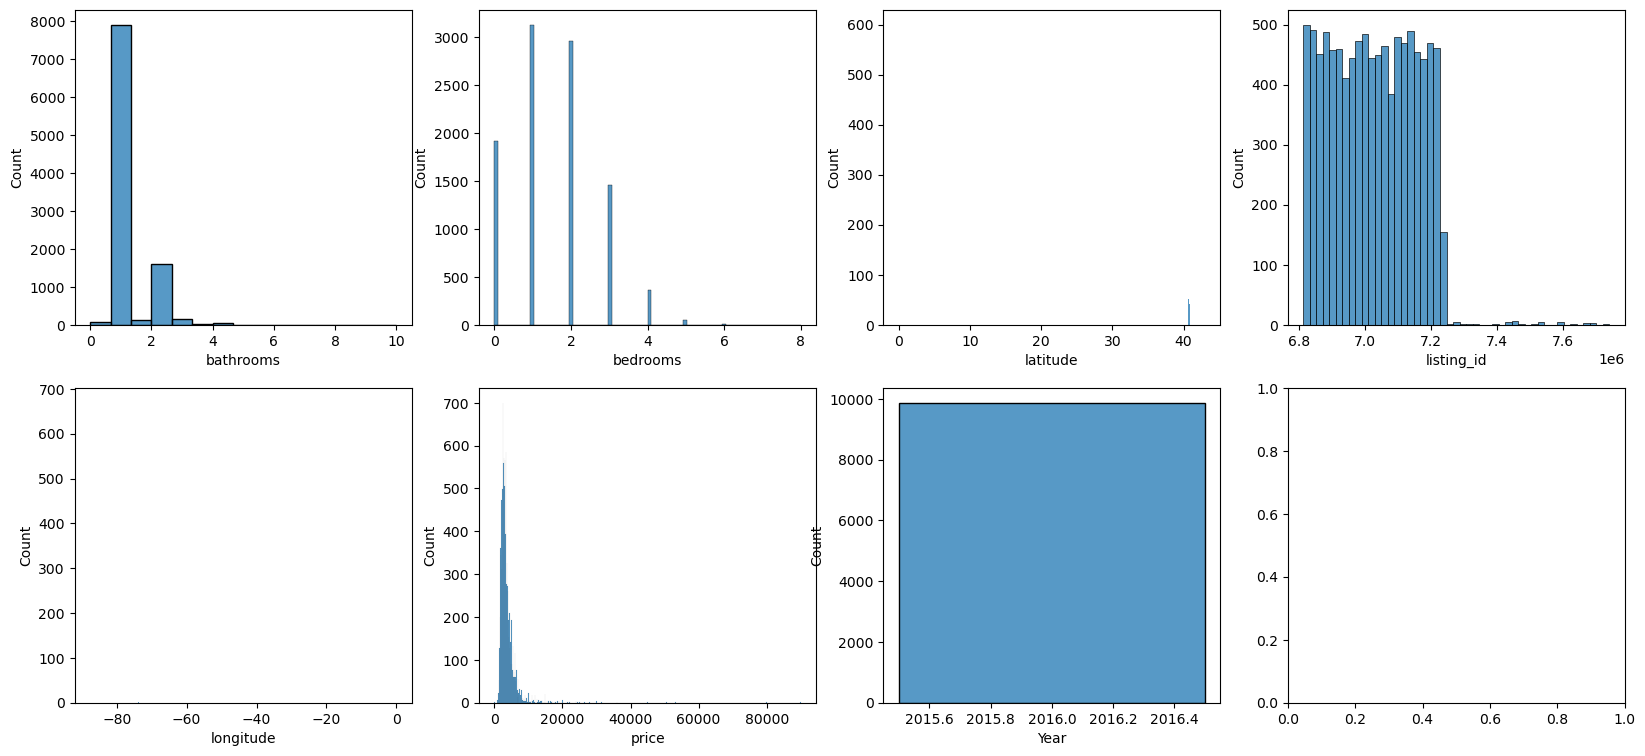

In [15]:
num_col = rent_df.select_dtypes(["int64","float64"])

fig,axs=plt.subplots(2,4,figsize=(20,9))
axs=axs.ravel()

count=0
for i in num_col:
    sns.histplot(x=i,data=rent_df,ax=axs[count])
    count+=1

<AxesSubplot:xlabel='price'>

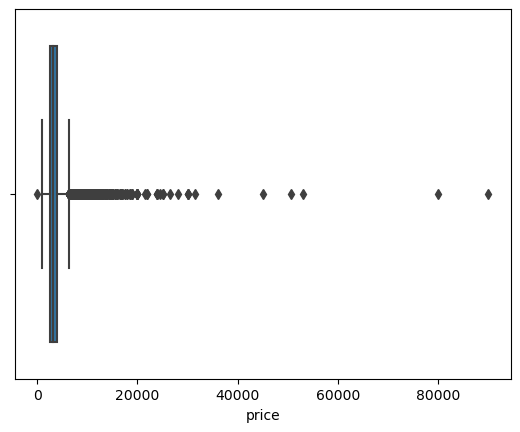

In [16]:
sns.boxplot('price',data=rent_df)

In [17]:
iqr=rent_df['price'].quantile(0.75)-rent_df['price'].quantile(0.25)
lf=rent_df['price'].quantile(0.25)-1.5*iqr
uf=rent_df['price'].quantile(0.75)+1.5*iqr
rent_df=rent_df[(rent_df['price']>lf) & (rent_df['price']<uf)]  

<AxesSubplot:xlabel='price'>

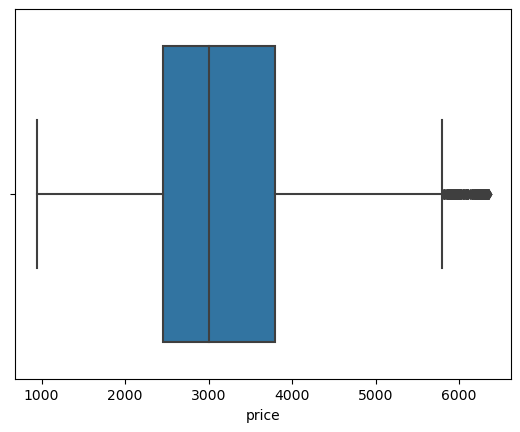

In [18]:
sns.boxplot('price',data=rent_df)

<AxesSubplot:xlabel='bathrooms'>

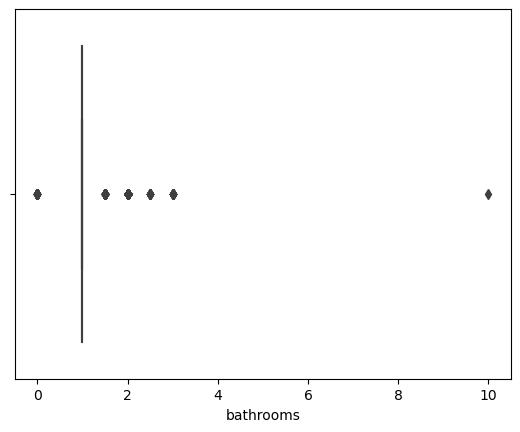

In [19]:
sns.boxplot('bathrooms',data=rent_df)

In [20]:
rent_df=rent_df[rent_df.bathrooms>1]

In [21]:
rent_df=rent_df[rent_df.bathrooms<10]

<AxesSubplot:xlabel='bathrooms'>

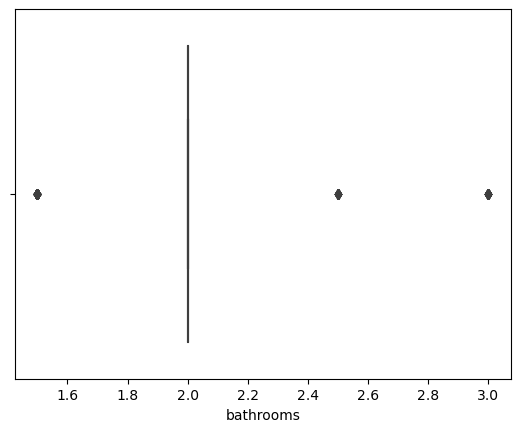

In [22]:
sns.boxplot('bathrooms',data=rent_df)

<AxesSubplot:xlabel='bedrooms'>

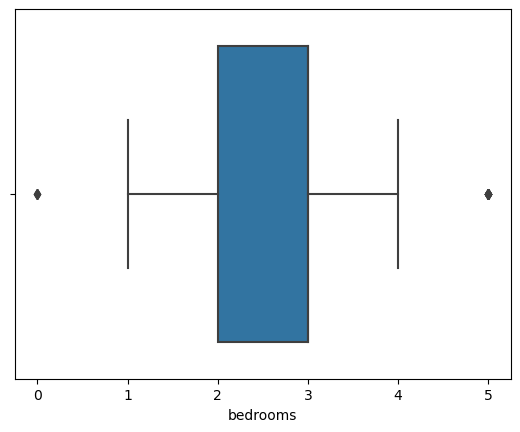

In [23]:
sns.boxplot('bedrooms',data=rent_df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

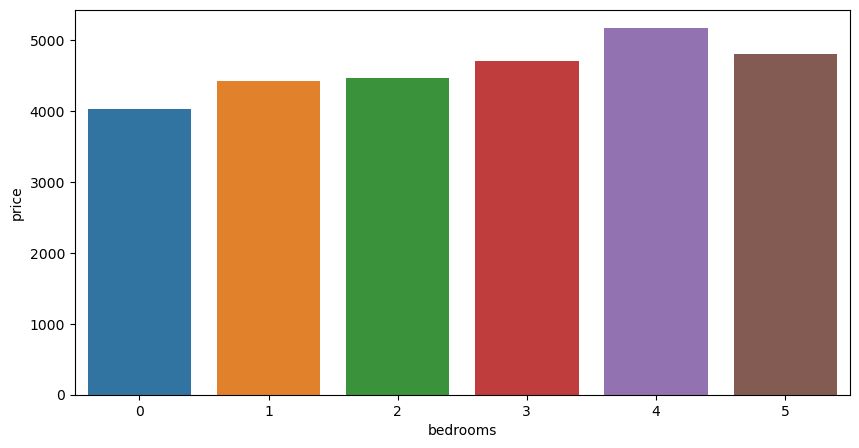

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(y="price",x="bedrooms",data=rent_df,ci=None)

In [25]:
def bar_pe(*s):
    for col in s:
        value_counts=rent_df[col].value_counts()
        fig,ax=plt.subplots(1,2,figsize=(10,2))
        sns.barplot(value_counts.index,value_counts.values,ax=ax[0])
        ax[0].set_title(f"count of {col} in each type")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")
        ax[0].set_xticks(ticks=range(len(value_counts.index)),labels=value_counts.index,rotation=90)
        
        per=rent_df[col].value_counts(normalize=True)*100
        ax[1].pie(per.values,labels=per.index,autopct="%1.1f%%")
        ax[1].set_title(f"percentage of {col}")

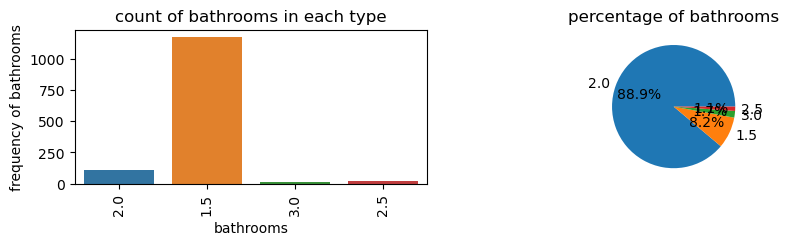

In [26]:
bar_pe("bathrooms")

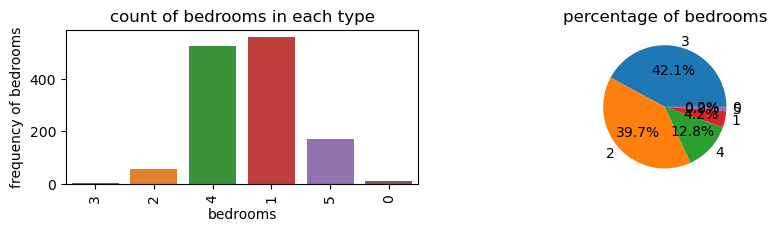

In [27]:
bar_pe("bedrooms")

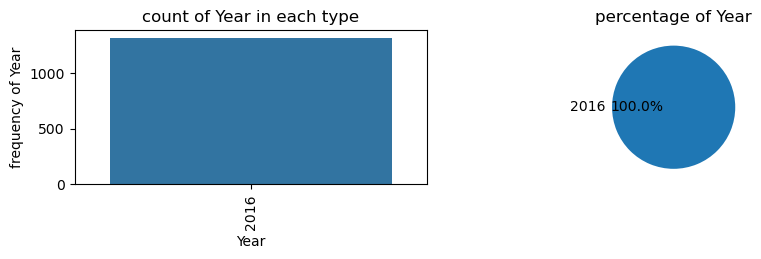

In [28]:
bar_pe("Year")

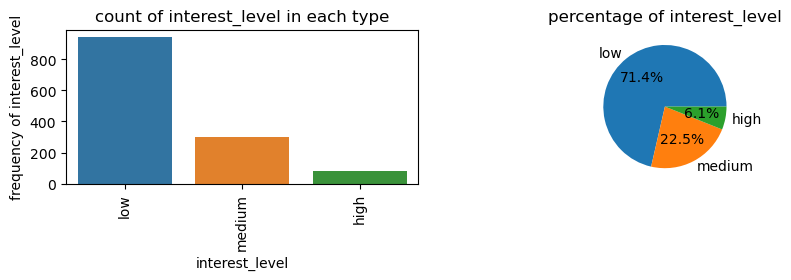

In [29]:
bar_pe("interest_level")

In [30]:
# converting col interest level to category

In [31]:
cat_col = ['features','interest_level']
rent_df[cat_col] = rent_df[cat_col].astype('category')

In [32]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322 entries, 13 to 9857
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   bathrooms       1322 non-null   float64 
 1   bedrooms        1322 non-null   int64   
 2   building_id     1322 non-null   object  
 3   features        1322 non-null   category
 4   latitude        1322 non-null   float64 
 5   listing_id      1322 non-null   int64   
 6   longitude       1322 non-null   float64 
 7   manager_id      1322 non-null   object  
 8   photos          1322 non-null   object  
 9   price           1322 non-null   int64   
 10  interest_level  1322 non-null   category
 11  Year            1322 non-null   int64   
dtypes: category(2), float64(3), int64(4), object(3)
memory usage: 156.8+ KB


In [33]:
# label_encoding for cat columns

In [34]:
label_encoder =preprocessing.LabelEncoder()

for col in cat_col:
    rent_df[col] = label_encoder.fit_transform(rent_df[col])

In [35]:
rent_df

,bathrooms,bedrooms,building_id,features,latitude,listing_id,longitude,manager_id,photos,price,interest_level,Year
13,2.0,3,530c892589e486da008e954ed9201a01,413,40.7655,7096444,-73.9857,c44ea3e83ff2048561ab5c21a2d0c90e,['https://photos.renthop.com/2/7096444_c8fca8a...,4300,0,2016
32,2.0,3,39e0fd76dd41985daf2ef025357827ae,636,40.7548,6847696,-73.9944,8da58be4eb691ae8f57d2f8d29c9f406,['https://photos.renthop.com/2/6847696_aa5e351...,4750,0,2016
33,2.0,3,def66042e8a251c1d46901412576ccfe,429,40.7369,6980711,-73.9821,c224f0c13e8bb14e79409501911fce73,['https://photos.renthop.com/2/6980711_ddadd88...,5000,0,2016
36,2.0,3,3a0714dbb437f4cb8eee74019ca0a326,224,40.7241,7098544,-73.9840,2a1ee03b449700c3a15dd8c9a505c525,['https://photos.renthop.com/2/7098544_59381ec...,5000,0,2016
37,2.0,3,93eda3b11a4c6db201a8ce95440f89b4,242,40.6567,7123059,-74.0043,14064f697b8043765126af9694121f47,['https://photos.renthop.com/2/7123059_510f857...,2495,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
9824,2.0,2,5ea720624cb42df19ea0bc8974f36ad9,440,40.6941,6966722,-73.9631,709e9a215ccbcac5c85c29a53822ae9c,['https://photos.renthop.com/2/6966722_1c372de...,3700,2,2016
9830,2.0,2,18b2a8a9109265cb7b369a925e384f87,743,40.7441,6832858,-73.9964,5e9eba8a0e49cd0c15d278e3d6407c67,['https://photos.renthop.com/2/6832858_d821ea6...,5000,2,2016
9833,2.0,2,814cded9f0f79f3bd24ee3c773b52636,80,40.7770,6834410,-73.9523,0ff0d93046667461eb044371b68a4999,['https://photos.renthop.com/2/6834410_02360e8...,2950,2,2016
9838,2.0,2,93a1ae856921542c1542b4dd2b06ab27,534,40.7448,6911514,-73.9947,d2bce61e0e0079ebdc8c281e415e045b,['https://photos.renthop.com/2/6911514_e0dd741...,6000,2,2016


In [36]:
# correleation

In [37]:
corr_mat = rent_df.corr()

In [38]:
corr_mat

,bathrooms,bedrooms,features,latitude,listing_id,longitude,price,interest_level,Year
bathrooms,1.000000,0.100436,-0.001798,0.033300,0.018189,0.024051,0.116557,0.036626,NaN
bedrooms,0.100436,1.000000,-0.013182,-0.013363,0.001393,-0.003537,0.194872,0.034934,NaN
features,-0.001798,-0.013182,1.000000,0.044830,-0.013116,0.001274,-0.004182,-0.013454,NaN
latitude,0.033300,-0.013363,0.044830,1.000000,0.013961,0.610476,-0.025891,-0.009174,NaN
listing_id,0.018189,0.001393,-0.013116,0.013961,1.000000,-0.012452,0.029481,0.027006,NaN
longitude,0.024051,-0.003537,0.001274,0.610476,-0.012452,1.000000,-0.208840,-0.018242,NaN
price,0.116557,0.194872,-0.004182,-0.025891,0.029481,-0.208840,1.000000,-0.038299,NaN
interest_level,0.036626,0.034934,-0.013454,-0.009174,0.027006,-0.018242,-0.038299,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

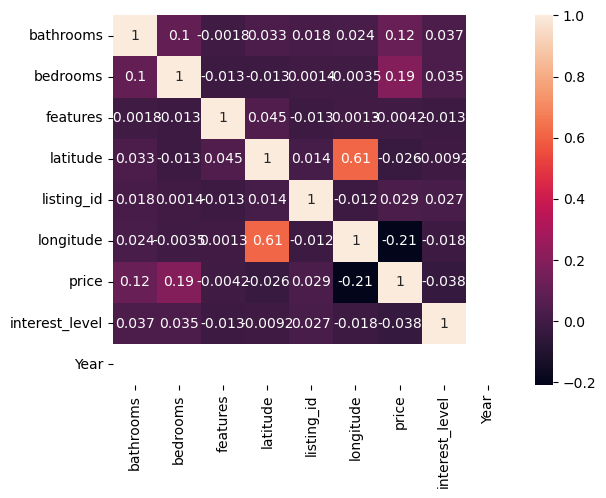

In [39]:
sns.heatmap(corr_mat,annot=True)

In [40]:
# price corr with bedrooms and bathrooms ,
# price is corr with latitude

In [41]:
rent_df.drop(columns=['building_id','manager_id','photos'],inplace=True)

In [42]:
# splitting the data

In [43]:
X=rent_df.drop(['interest_level'],axis=1)
y=rent_df['interest_level']

scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[ 0.09018988,  0.4304464 , -0.1405821 , ..., -0.18393375,
        -0.33136492,  0.        ],
       [ 0.09018988,  0.4304464 ,  0.73471509, ..., -0.28253252,
         0.08339201,  0.        ],
       [ 0.09018988,  0.4304464 , -0.07778051, ..., -0.14313426,
         0.31381253,  0.        ],
       ...,
       [ 0.09018988, -0.82573493, -1.44764024, ...,  0.19459484,
        -1.57563572,  0.        ],
       [ 0.09018988, -0.82573493,  0.33435494, ..., -0.28593247,
         1.2354946 ,  0.        ],
       [ 0.09018988, -0.82573493, -1.56931833, ..., -0.10913469,
        -1.64476188,  0.        ]])

**Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test,y_train, y_test=train_test_split(scaled_X,y,test_size=0.3,random_state=42)

In [46]:
log_model=LogisticRegression().fit(X_train,y_train)

In [47]:
y_pred=log_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
print("score on train : ", log_model.score(X_train,y_train))

score on train :  0.707027027027027


In [49]:
print("score on test : ", log_model.score(X_test,y_test))

score on test :  0.7481108312342569


In [50]:
#model evaluation for classification
clm=confusion_matrix(y_test,y_pred).ravel()

print(clm)

[  0  16   3   0 290   7   0  74   7]


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.76      0.98      0.86       297
           2       0.41      0.09      0.14        81

    accuracy                           0.75       397
   macro avg       0.39      0.35      0.33       397
weighted avg       0.65      0.75      0.67       397



**Naive Bayes**

In [52]:
from sklearn.naive_bayes import GaussianNB 

In [53]:
nb_model=GaussianNB().fit(X_train,y_train)
y_pred=nb_model.predict(X_test)

In [54]:
y_pred

array([2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,

In [55]:
print("score on train: " ,nb_model.score(X_train,y_train))

score on train:  0.3675675675675676


In [56]:
print("score on test:" ,nb_model.score(X_test,y_test))

score on test: 0.3350125944584383


In [57]:
print(accuracy_score(y_test,y_pred))

0.3350125944584383


In [58]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[  2   2  15]
 [  5  64 228]
 [  3  11  67]]


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.20      0.11      0.14        19
           1       0.83      0.22      0.34       297
           2       0.22      0.83      0.34        81

    accuracy                           0.34       397
   macro avg       0.42      0.38      0.27       397
weighted avg       0.68      0.34      0.33       397



Text(120.72222222222221, 0.5, 'predicted')

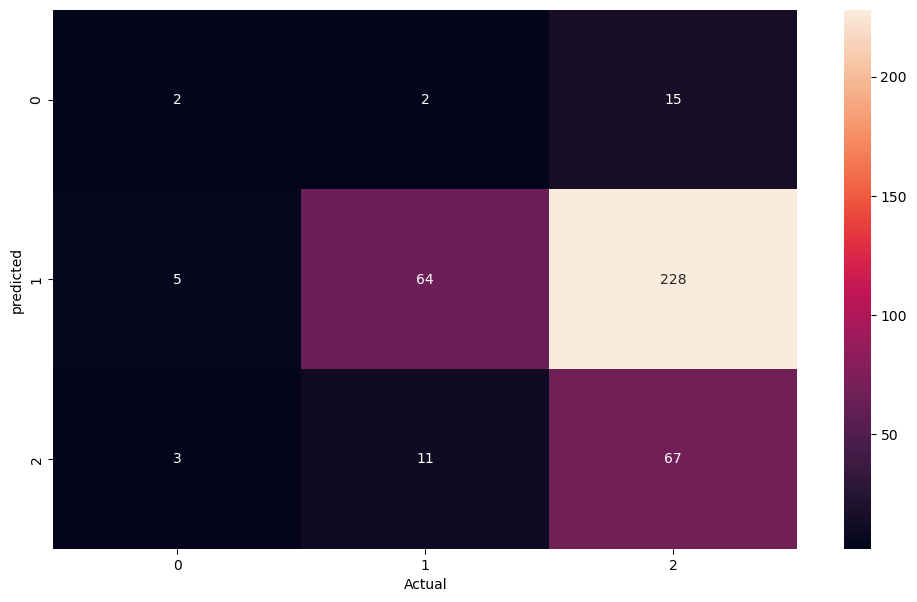

In [60]:
plt.figure(figsize=(12,7))
sns.heatmap(cm,annot=True,fmt='d') # fmt formatting
plt.xlabel("Actual")
plt.ylabel("predicted")

In [61]:
nb_model.score(X_test,y_test)

0.3350125944584383

In [62]:
nb_model.score(X_train,y_train)

0.3675675675675676

**Decision Tree classifier** 

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import r2_score
import numpy as np

In [64]:
de_model=DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

In [65]:
y_pred=de_model.predict(X_test)

In [66]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [67]:
print(accuracy_score(y_test,y_pred))

0.7531486146095718


In [68]:
print("score on train: " , de_model.score(X_train,y_train))

score on train:  0.707027027027027


In [69]:
print("score on test: " , de_model.score(X_test,y_test))

score on test:  0.7531486146095718


In [70]:
cdm=confusion_matrix(y_test,y_pred)
print(cdm)

[[  2  17   0]
 [  1 296   0]
 [  1  79   1]]


In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.11      0.17        19
           1       0.76      1.00      0.86       297
           2       1.00      0.01      0.02        81

    accuracy                           0.75       397
   macro avg       0.75      0.37      0.35       397
weighted avg       0.79      0.75      0.66       397



In [72]:
de_model.score(X_test,y_test)

0.7531486146095718

In [73]:
de_model.score(X_train,y_train)

0.707027027027027

[Text(0.5, 0.875, 'price <= 0.325\ngini = 0.451\nsamples = 925\nvalue = [61, 647, 217]\nclass = y[1]'),
 Text(0.25, 0.625, 'bathrooms <= -1.152\ngini = 0.511\nsamples = 591\nvalue = [50, 375, 166]\nclass = y[1]'),
 Text(0.125, 0.375, 'listing_id <= 1.588\ngini = 0.087\nsamples = 66\nvalue = [0, 63, 3]\nclass = y[1]'),
 Text(0.0625, 0.125, 'gini = 0.06\nsamples = 65\nvalue = [0, 63, 2]\nclass = y[1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = y[2]'),
 Text(0.375, 0.375, 'price <= -2.543\ngini = 0.541\nsamples = 525\nvalue = [50, 312, 163]\nclass = y[1]'),
 Text(0.3125, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [6, 0, 1]\nclass = y[0]'),
 Text(0.4375, 0.125, 'gini = 0.532\nsamples = 518\nvalue = [44, 312, 162]\nclass = y[1]'),
 Text(0.75, 0.625, 'bedrooms <= -0.198\ngini = 0.312\nsamples = 334\nvalue = [11, 272, 51]\nclass = y[1]'),
 Text(0.625, 0.375, 'listing_id <= -0.446\ngini = 0.137\nsamples = 123\nvalue = [1, 114, 8]\nclass = y[1]'),
 Text(0.5625, 

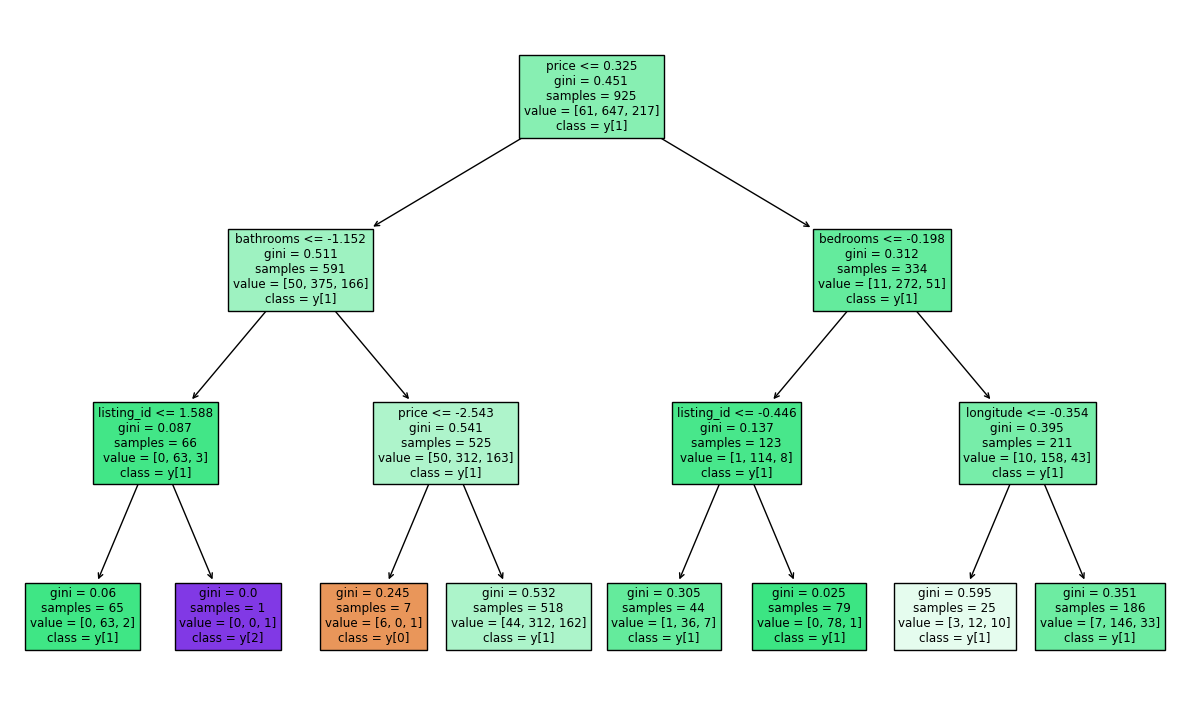

In [74]:
plt.figure(figsize=(15,9))
tree.plot_tree(de_model,filled=True,feature_names=rent_df.columns,class_names=True)

**Random forest Classifier**

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [76]:
kf=KFold(n_splits=5)

# max_depth is calculated here 
# for i in range(1,15):
#     score=cross_val_score(RandomForestClassifier(max_depth=i),X,y,scoring="accuracy",cv=kf)
#     print(np.mean(score))

In [77]:
X_train, X_test,y_train, y_test=train_test_split(scaled_X,y,test_size=0.3,random_state=42)

In [78]:
rf=RandomForestClassifier(n_estimators=100,max_depth=13,n_jobs=-1,random_state=42)

In [79]:
param_grid={"n_estimators":[10,20,40,50,70,100,150,200], #np.arange
            "min_samples_split":[10,20,30], #sample size
            "min_samples_leaf":[20,40,100],
            "max_depth":[3,4,5,6,7,8,9,10]
}

In [80]:
grid_cv = GridSearchCV(rf,param_grid,cv=kf,scoring="accuracy")
# finding the best parameters 

In [81]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=13, n_jobs=-1,
                                              random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [10, 20, 40, 50, 70, 100, 150, 200]},
             scoring='accuracy')

In [82]:
grid_cv.best_score_ #r.sq

0.7037837837837838

In [83]:
grid_cv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 10,
 'n_estimators': 10}

In [84]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=10,
                       n_estimators=10, n_jobs=-1, random_state=42)

In [85]:
model = RandomForestClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=10,
                       n_estimators=10, n_jobs=-1, random_state=42)

model.fit(X,y)

RandomForestClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=10,
                       n_estimators=10, n_jobs=-1, random_state=42)

[Text(0.3489583333333333, 0.9444444444444444, 'price <= -1.495\ngini = 0.456\nsamples = 584\nvalue = [54, 639, 232]\nclass = y[1]'),
 Text(0.16666666666666666, 0.8333333333333334, 'features <= -0.598\ngini = 0.604\nsamples = 68\nvalue = [17, 37, 56]\nclass = y[2]'),
 Text(0.125, 0.7222222222222222, 'gini = 0.462\nsamples = 23\nvalue = [5, 6, 26]\nclass = y[2]'),
 Text(0.20833333333333334, 0.7222222222222222, 'latitude <= -0.159\ngini = 0.624\nsamples = 45\nvalue = [12, 31, 30]\nclass = y[1]'),
 Text(0.16666666666666666, 0.6111111111111112, 'gini = 0.605\nsamples = 20\nvalue = [6, 12, 19]\nclass = y[2]'),
 Text(0.25, 0.6111111111111112, 'gini = 0.6\nsamples = 25\nvalue = [6, 19, 11]\nclass = y[1]'),
 Text(0.53125, 0.8333333333333334, 'bathrooms <= -1.152\ngini = 0.406\nsamples = 516\nvalue = [37, 602, 176]\nclass = y[1]'),
 Text(0.4895833333333333, 0.7222222222222222, 'gini = 0.15\nsamples = 38\nvalue = [0, 56, 5]\nclass = y[1]'),
 Text(0.5729166666666666, 0.7222222222222222, 'price <= 

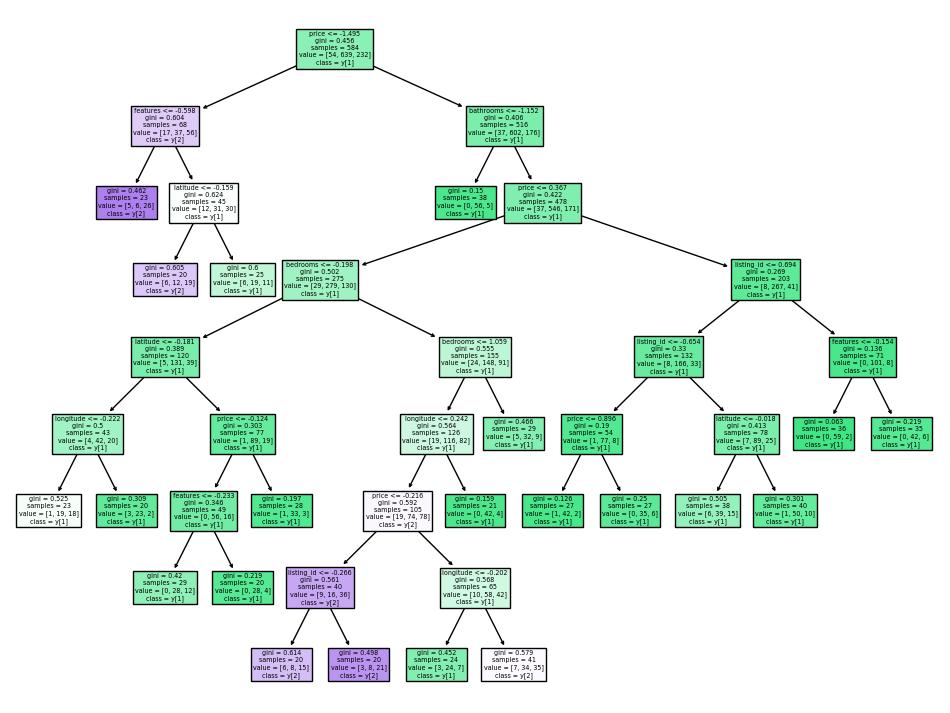

In [86]:
plt.figure(figsize=(12,9))
from sklearn import tree
tree.plot_tree(grid_cv.best_estimator_[0],feature_names=X.columns,filled=True,class_names=True)

In [87]:
print(confusion_matrix(y_test,y_pred))

[[  2  17   0]
 [  1 296   0]
 [  1  79   1]]


In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.11      0.17        19
           1       0.76      1.00      0.86       297
           2       1.00      0.01      0.02        81

    accuracy                           0.75       397
   macro avg       0.75      0.37      0.35       397
weighted avg       0.79      0.75      0.66       397



In [89]:
feat_imp = pd.DataFrame({"feature":X.columns,"values":grid_cv.best_estimator_.feature_importances_})
feat_imp.sort_values(by="values",ascending=False)

,feature,values
6,price,0.301665
2,features,0.169951
5,longitude,0.147255
3,latitude,0.106016
4,listing_id,0.103382
0,bathrooms,0.087402
1,bedrooms,0.084329
7,Year,0.000000


In [90]:
#avg voting from 10 trees 
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Random forest is the best model with high accuracy on the test data.